<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-01-14 15:16:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.32’

m4_survey_data.sqli 100%[===================>]  34.98M  41.7MB/s    in 0.8s    

2024-01-14 15:16:49 (41.7 MB/s) - ‘m4_survey_data.sqlite.32’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas, numpy and matplotlib modules.


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import *
from scipy import stats

## Demo: How to run an sql query


In [7]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

COUNT(*)
0     11398

## Demo: How to list all tables


In [8]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


Table_Name
0                 EduOther
1                  DevType
2                  LastInt
3               JobFactors
4                 WorkPlan
5            WorkChallenge
6       LanguageWorkedWith
7   LanguageDesireNextYear
8       DatabaseWorkedWith
9   DatabaseDesireNextYear
10      PlatformWorkedWith
11  PlatformDesireNextYear
12      WebFrameWorkedWith
13  WebFrameDesireNextYear
14      MiscTechWorkedWith
15  MiscTechDesireNextYear
16              DevEnviron
17              Containers
18               SOVisitTo
19            SONewContent
20                  Gender
21               Sexuality
22               Ethnicity
23                  master

## Demo: How to run a group by query


In [9]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

Age  count
0    NaN    287
1   16.0      3
2   17.0      6
3   18.0     29
4   19.0     78
5   20.0    109
6   21.0    203
7   22.0    406
8   23.0    581
9   24.0    679
10  25.0    738
11  26.0    720
12  27.0    724
13  28.0    787
14  29.0    697
15  30.0    651
16  31.0    531
17  32.0    489
18  33.0    483
19  34.0    395
20  35.0    393
21  36.0    308
22  37.0    280
23  38.0    279
24  39.0    232
25  40.0    187
26  41.0    136
27  42.0    162
28  43.0    100
29  44.0     95
30  45.0     85
31  46.0     66
32  47.0     68
33  48.0     64
34  49.0     66
35  50.0     57
36  51.0     29
37  52.0     41
38  53.0     32
39  54.0     26
40  55.0     13
41  56.0     16
42  57.0     11
43  58.0     12
44  59.0     11
45  60.0      2
46  61.0     10
47  62.0      5
48  63.0      7
49  65.0      2
50  66.0      1
51  67.0      1
52  69.0      1
53  71.0      2
54  72.0      1
55  99.0      1

## Demo: How to describe a table


In [10]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


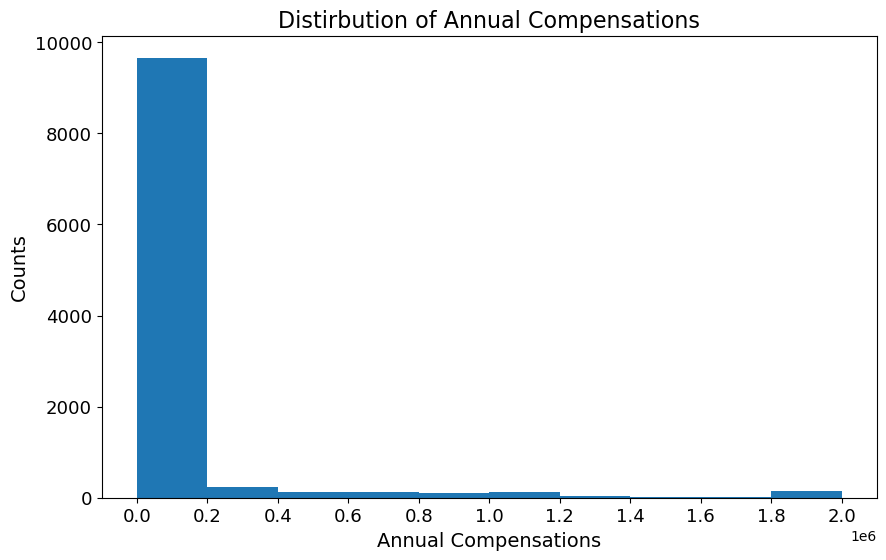

In [11]:
# your code goes here

# Let's extract the corresponding column 'ConvertedComp'
query1 = """ SELECT ConvertedComp FROM master"""
df_hist = pd.read_sql_query(query1,conn)

# Let's drop the na values from the column 'ConvertedComp'
df_hist.dropna(inplace = True)

#Let's get the x-tick values
count, bin_edges = np.histogram(df_hist, 10)

# Let's create an un-stacked histogram
df_hist.plot(kind = 'hist', figsize = (10,6), xticks = bin_edges)
plt.title('Distirbution of Annual Compensations', size = 16)
plt.ylabel('Counts', size = 14)
plt.xlabel('Annual Compensations', size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.legend('', frameon=False)
plt.show()

### Box Plots


Plot a box plot of `Age.`


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

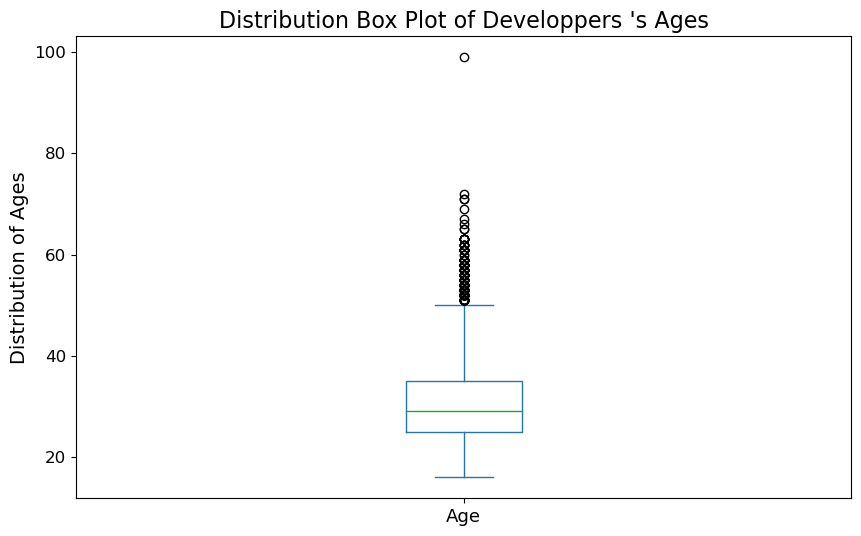

In [12]:
# your code goes here
query2 = """SELECT Age FROM master"""
df_box = pd.read_sql_query(query2,conn)

#Let's drop the na from the column 'Age'
df_box.dropna(inplace = True)

# Let's create the box plot
df_box.plot(kind = 'box', figsize = (10,6))

plt.title('Distribution Box Plot of Developpers \'s Ages', size = 16)
#plt.xlabel('Age', size = 14)
plt.ylabel('Distribution of Ages', size = 14)
plt.xticks(size = 13)
plt.yticks(size = 12)

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

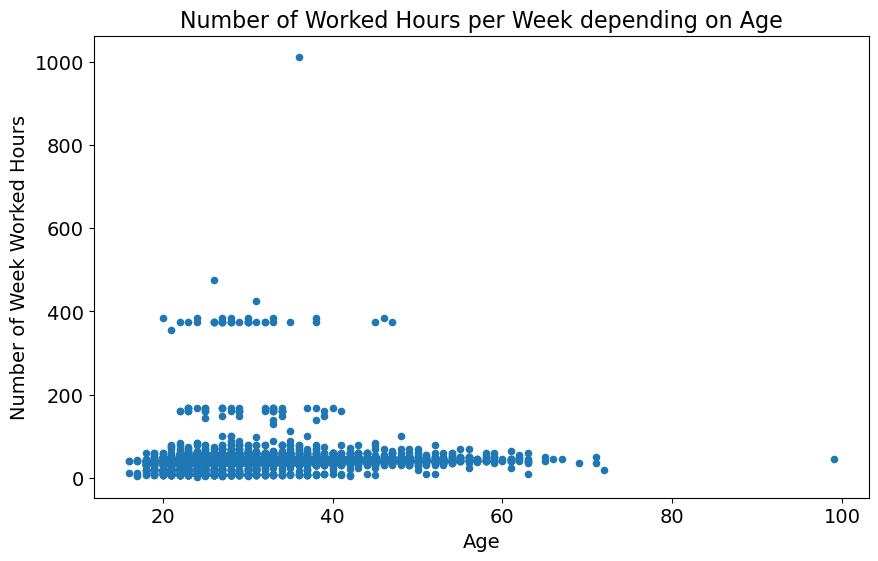

In [13]:
# your code goes here
query3 = """Select Age, WorkWeekHrs FROM master"""
df_scat = pd.read_sql_query(query3,conn)

# Let's drop the na values from df_scat
df_scat.dropna(inplace = True)

# Reset the index
df_scat.reset_index(inplace=True)

# Let's plot the scatter plot
df_scat.plot(kind = 'scatter', x = 'Age', y= 'WorkWeekHrs', figsize = (10,6))
plt.title('Number of Worked Hours per Week depending on Age', size = 16)
plt.xlabel('Age', size = 14)
plt.ylabel('Number of Week Worked Hours', size = 14)
plt.xticks(size = 14)
plt.yticks(size = 14)

In [14]:
# Determine the Pearson coefficient and the p-values for Wnumber of Week Worked Hours and Age
pearson_scat, p_scat = stats.pearsonr(df_scat['Age'], df_scat['WorkWeekHrs'])
print("The Pearson coefficient is ", pearson_scat, "and the p-values are p = ", p_scat)

The Pearson coefficient is  0.036517470182880936 and the p-values are p =  0.00012771329654450927


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


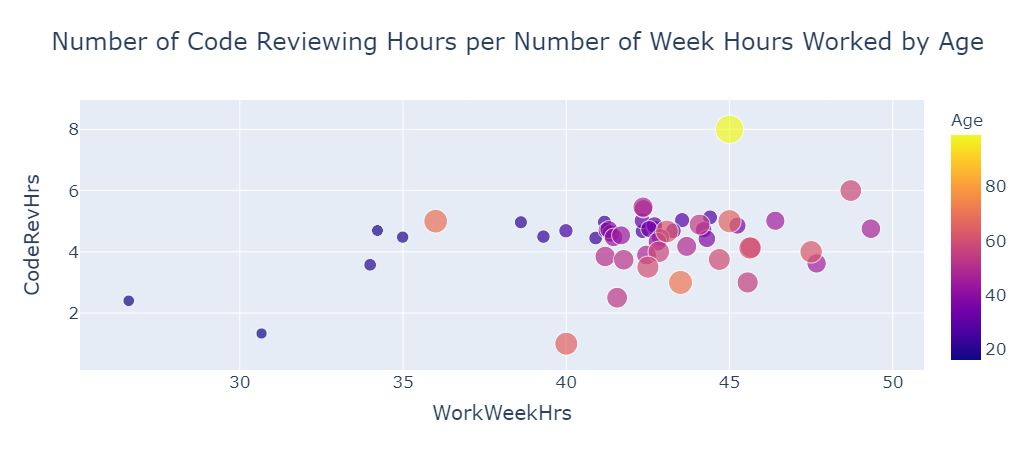

In [15]:
# your code goes here
query4 = """SELECT WorkWeekHrs, CodeRevHrs, Age FROM master"""
df_bubbles = pd.read_sql_query(query4,conn)


# Drop na values from df_bubbles
df_bubbles.dropna(inplace = True)

# Create a list with the variables to group
WorkRev_list = ['WorkWeekHrs', 'CodeRevHrs']

#Group data from df_bubbles by 'Age'
bub_data = df_bubbles.groupby(['Age'])[WorkRev_list].mean().reset_index()




# Let's create the bubble chart using px.scatter
fig = px.scatter(bub_data, x = 'WorkWeekHrs', y = 'CodeRevHrs', size = 'Age', color = 'Age',
                 title = 'Number of Code Reviewing Hours per Number of Week Hours Worked by Age')

fig.update_layout(font = dict(size = 17))


#Show the figure
fig.show()


In [16]:
bub_data.head(10)

Age  WorkWeekHrs  CodeRevHrs
0  16.0    30.666667    1.333333
1  17.0    26.600000    2.400000
2  18.0    34.217391    4.695652
3  19.0    34.988372    4.479302
4  20.0    33.993056    3.576389
5  21.0    38.610140    4.965035
6  22.0    39.300000    4.496786
7  23.0    40.901111    4.451111
8  24.0    41.169941    4.968075
9  25.0    39.989691    4.687474

In [17]:
bub_data.describe()

Age  WorkWeekHrs  CodeRevHrs
count  53.000000    53.000000   53.000000
mean   42.754717    42.061046    4.364199
std    17.212368     4.153821    1.065049
min    16.000000    26.600000    1.000000
25%    29.000000    41.216184    4.000000
50%    42.000000    42.539735    4.599537
75%    55.000000    44.306452    4.872754
max    99.000000    49.330189    8.000000

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


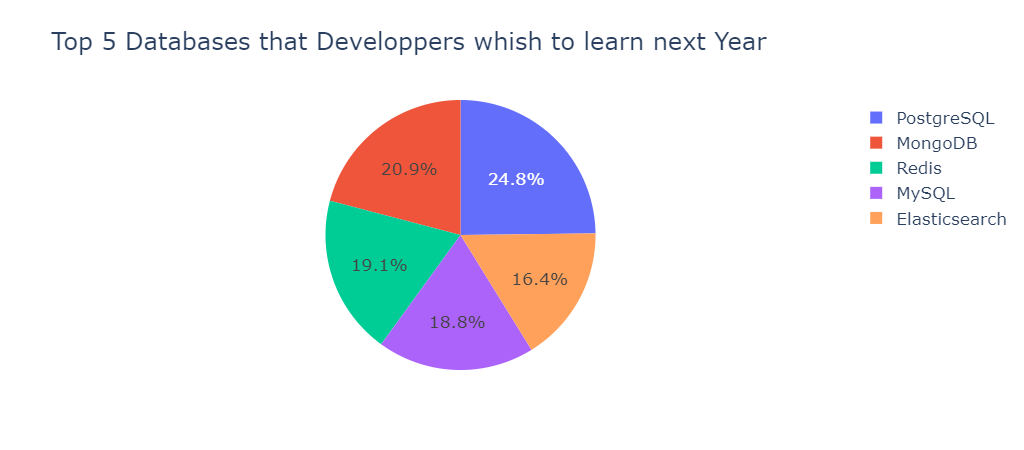

In [18]:
# your code goes here

# Let's call the table DatabaseDesireNextYear
query5 = """SELECT * FROM DatabaseDesireNextYear"""
df_dataB = pd.read_sql_query(query5,conn)


# Let's group the data among the different databases
grouped_db = df_dataB.groupby('DatabaseDesireNextYear')['Respondent'].count().to_frame()
grouped_db.reset_index(inplace= True)

# Let's sort the data among the top 5 databases
grouped_db.sort_values(by = 'Respondent', ascending = False, axis = 0, inplace = True)
grouped_db_top5 = grouped_db.head(5)
grouped_db_top5

# Let's create the pie chart
pie_fig = px.pie(grouped_db_top5, values = 'Respondent', names = 'DatabaseDesireNextYear', 
                 title = 'Top 5 Databases that Developpers whish to learn next Year')

pie_fig.update_layout(font = dict(size = 17))

pie_fig.show()

In [19]:
# Let's determine the top 5 desired languages that developers wish to learn next Year

query5bis = """SELECT * FROM LanguageDesireNextYear"""
df_lang= pd.read_sql_query(query5bis,conn)

df_lang


# Let's group the data by counts of Desired language
df_lang = df_lang.groupby('LanguageDesireNextYear')['LanguageDesireNextYear'].count().to_frame('Counts')
df_lang.reset_index(inplace= True)


# Let's order the table df_lang by descending order
df_lang.sort_values(by = 'Counts', ascending = False, inplace = True)
df_lang = df_lang.head(5)
df_lang

LanguageDesireNextYear  Counts
13             JavaScript    6630
11               HTML/CSS    5328
18                 Python    5239
22                    SQL    5012
25             TypeScript    4088

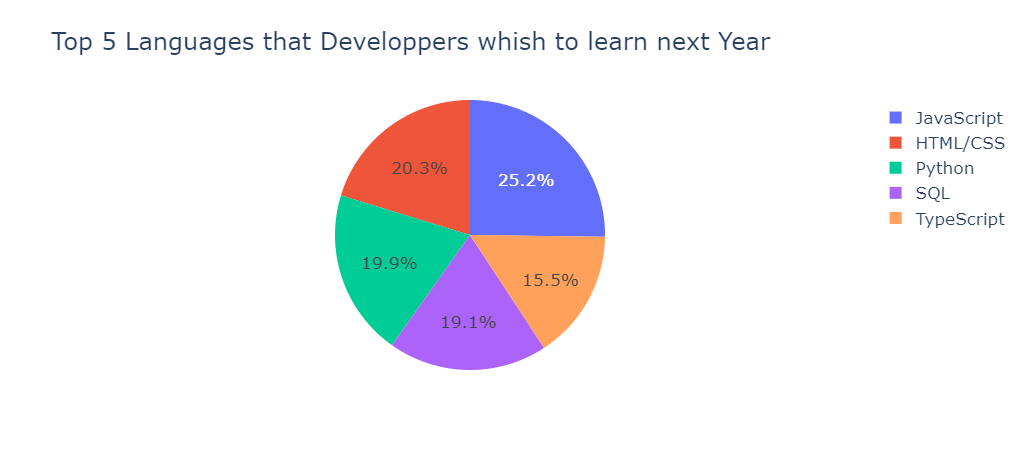

In [20]:
# Let's create the pie chart
pie_fig2 = px.pie(df_lang, values = 'Counts', names = 'LanguageDesireNextYear', 
                 title = 'Top 5 Languages that Developpers whish to learn next Year')

pie_fig2.update_layout(font = dict(size = 17))

pie_fig2.show()

In [21]:
# Let's call the table DatabaseDesireNextYear
query52 = """SELECT * FROM DatabaseWorkedWith"""
df_dataBW = pd.read_sql_query(query52,conn)
df_dataBW
# Let's drop the duplicates from the column 'Respondent'

df_dataBW.drop_duplicates(subset = 'Respondent', inplace=True, keep = False)
df_dataBW


# Let's determine the number of developers using MySQL
total_mysql = 0
for index, column in df_dataBW.iterrows():
    
    if column['DatabaseWorkedWith'] == 'MySQL':
        total_mysql += 1

print('The number of developers using MySQL are {}'.format(total_mysql))

The number of developers using MySQL are 474


In [22]:
# Let's call the table LanguageWorkedWith
query53 = """SELECT * FROM LanguageWorkedWith"""
df_dataLan = pd.read_sql_query(query53,conn)

# Let's group the data among the different databases
grouped_db3 = df_dataLan.groupby('LanguageWorkedWith')['Respondent'].count().to_frame()
grouped_db3.reset_index(inplace= True)

# Let's sort the data among the top 5 databases
grouped_db3.sort_values(by = 'Respondent', ascending = False, axis = 0, inplace = True)

grouped_db3.head(5)

LanguageWorkedWith  Respondent
13             JavaScript        8687
11               HTML/CSS        7830
22                    SQL        7106
1   Bash/Shell/PowerShell        4642
18                 Python        4542

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



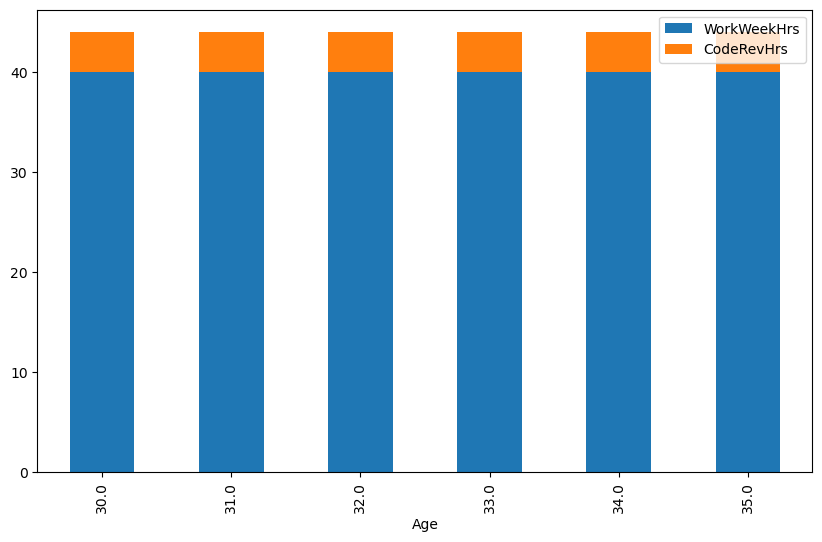

In [23]:
# your code goes here

query6 = """SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE (Age >= 30 AND Age <= 35)
"""
df_stack = pd.read_sql_query(query6,conn)
df_stack.dropna(inplace = True)
df_stack = df_stack.groupby(['Age'])['WorkWeekHrs','CodeRevHrs'].median()

df_stack


# Define the stacked histogram
df_stack.plot(kind = 'bar', figsize = (10,6), stacked = True)
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


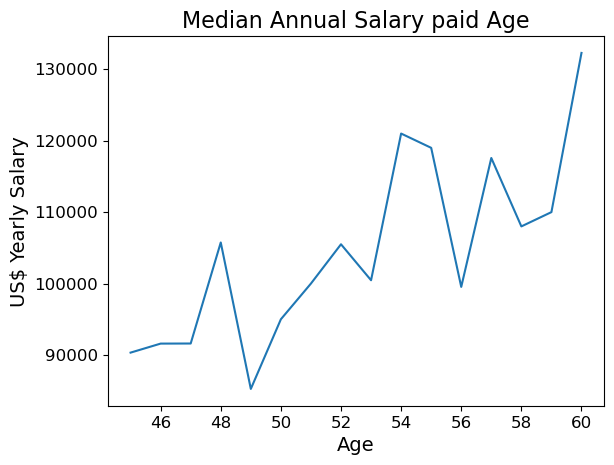

In [24]:
# your code goes here

query7 = """SELECT Age, ConvertedComp
FROM master
WHERE (Age >= 45 AND Age <= 60)
"""
df_line = pd.read_sql_query(query7,conn)

#Drop the na values from df_line dataset
df_line.dropna(inplace = True)

#Group data by Age and ConvertedComp median
df_line = df_line.groupby('Age')['ConvertedComp'].median().to_frame()

# Let's reset the index of the dataset
df_line.reset_index(inplace = True)


# Plot the line chart
df_line.plot(kind = 'line', x = 'Age', y = 'ConvertedComp')
plt.title('Median Annual Salary paid Age', size = 16)
plt.xlabel('Age', size = 14)
plt.ylabel('US\$ Yearly Salary', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.legend('', frameon=False)
plt.show()

In [25]:
# Obtain the statistical description for ages between 45 and 60
df_line['ConvertedComp'].describe().to_frame()

ConvertedComp
count      16.000000
mean   104555.375000
std     12978.084775
min     85248.000000
25%     94151.500000
50%    102981.500000
75%    111894.500000
max    132287.500000

In [26]:
# Calculate the Pearson correlation coefficient and the p-value for the 45-60
pearson_coef4560, p_value4560 = stats.pearsonr(df_line['Age'], df_line['ConvertedComp'])
print("The Pearson correlation is ", pearson_coef4560, "with a p-value of p = ", p_value4560)

The Pearson correlation is  0.7732779919778865 with a p-value of p =  0.00044246033876964644


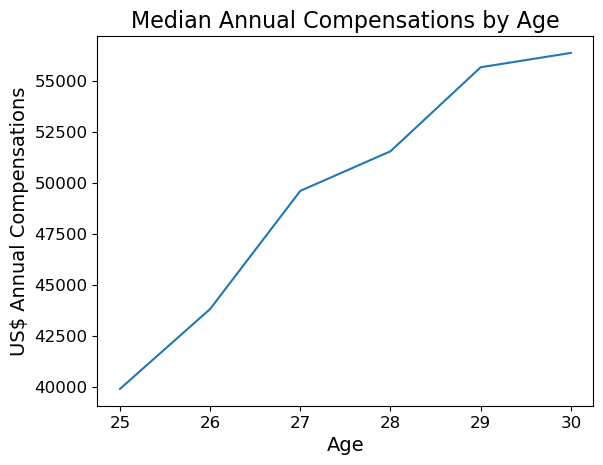

In [27]:
# your code goes here

query7 = """SELECT Age, ConvertedComp
FROM master
WHERE (Age >= 25 AND Age <= 30)
"""
df_line2 = pd.read_sql_query(query7,conn)

#Drop the na values from df_line dataset
df_line2.dropna(inplace = True)

#Group data by Age and ConvertedComp median
df_line2 = df_line2.groupby('Age')['ConvertedComp'].median().to_frame()

# Let's reset the index of the dataset
df_line2.reset_index(inplace = True)


# Plot the line chart
df_line2.plot(kind = 'line', x = 'Age', y = 'ConvertedComp')
plt.title('Median Annual Compensations by Age', size = 16)
plt.xlabel('Age', size = 14)
plt.ylabel('US\$ Annual Compensations', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.legend('', frameon=False)
plt.show()

In [28]:
# Obtain the statistical description for ages between 25 and 30
df_line2['ConvertedComp'].describe().to_frame()

ConvertedComp
count       6.000000
mean    49497.166667
std      6535.004833
min     39920.000000
25%     45280.500000
50%     50589.500000
75%     54645.250000
max     56376.000000

In [29]:
# Calculate the Pearson correlation coefficient and the p-value for the 25-30
pearson_coef2530, p_value2530 = stats.pearsonr(df_line2['Age'], df_line2['ConvertedComp'])
print("The Pearson correlation is ", pearson_coef2530, "with a p-value of p = ", p_value2530)

The Pearson correlation is  0.9793900590249669 with a p-value of p =  0.0006327772616091537


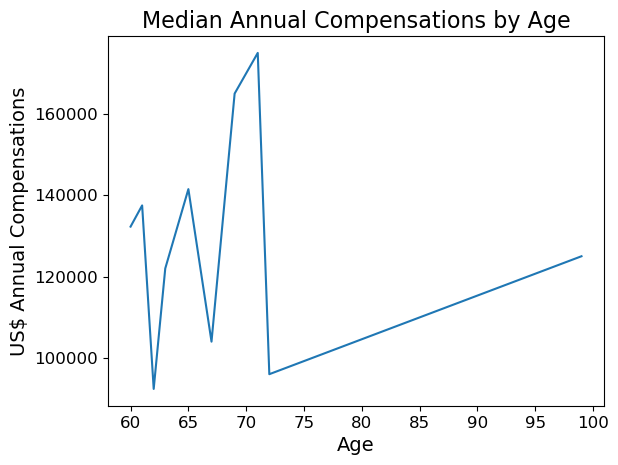

In [30]:
# your code goes here

query17 = """SELECT Age, ConvertedComp
FROM master
WHERE (Age >= 60 AND Age <= 100)
"""
df_line_60100 = pd.read_sql_query(query17,conn)

#Drop the na values from df_line dataset
df_line_60100.dropna(inplace = True)

#Group data by Age and ConvertedComp median
df_line_60100 = df_line_60100.groupby('Age')['ConvertedComp'].median().to_frame()

# Reset the index
df_line_60100.reset_index(inplace = True)

# Plot the line chart
df_line_60100.plot(kind = 'line', x = 'Age', y = 'ConvertedComp')
plt.title('Median Annual Compensations by Age', size = 16)
plt.xlabel('Age', size = 14)
plt.ylabel('US\$ Annual Compensations', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.legend('', frameon=False)
plt.show()

In [31]:
df_line_60100

Age  ConvertedComp
0  60.0       132287.5
1  61.0       137500.0
2  62.0        92376.0
3  63.0       122000.0
4  65.0       141508.0
5  67.0       104000.0
6  69.0       165000.0
7  71.0       175000.0
8  72.0        96000.0
9  99.0       125000.0

In [32]:
# Obtain the statistical data from the 'Co,vertedComp' Column for the 60-99
df_line_60100['ConvertedComp'].describe().to_frame()

ConvertedComp
count      10.000000
mean   129067.150000
std     27430.275255
min     92376.000000
25%    108500.000000
50%    128643.750000
75%    140506.000000
max    175000.000000

In [33]:
# Calculate the Pearson correlation coefficient and the p-value for the 60-99
pearson_coef60100, p_value60100 = stats.pearsonr(df_line_60100['Age'], df_line_60100['ConvertedComp'])
print("The Pearson correlation is ", pearson_coef60100, "with a p-value of p =" , p_value60100)

The Pearson correlation is  0.02630424511038213 with a p-value of p = 0.9424992603583431


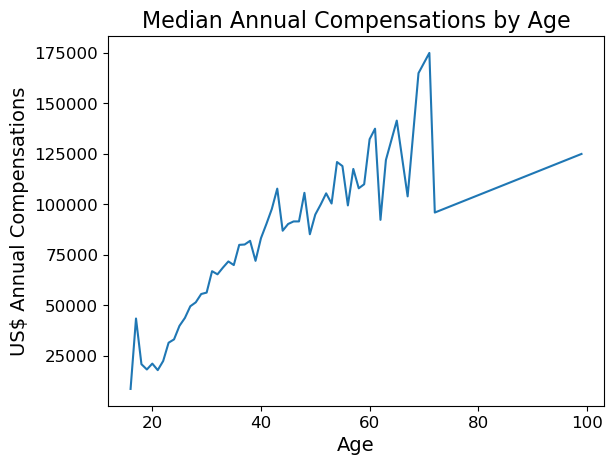

In [34]:
# your code goes here

query14 = """SELECT Age, ConvertedComp
FROM master
"""
df_line_age = pd.read_sql_query(query14,conn)

#Drop the na values from df_line dataset
df_line_age.dropna(inplace = True)

#Group data by Age and ConvertedComp median
df_line_age = df_line_age.groupby('Age')['ConvertedComp'].median().to_frame()

# Reset the indexes
df_line_age.reset_index(inplace = True)

# Plot the line chart
df_line_age.plot(kind = 'line', x = 'Age', y = 'ConvertedComp')
plt.title('Median Annual Compensations by Age', size = 16)
plt.xlabel('Age', size = 14)
plt.ylabel('US\$ Annual Compensations', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.legend('', frameon=False)
plt.show()

In [35]:
# Obtain the statistical description for all ages
df_line_age['ConvertedComp'].describe().to_frame()

ConvertedComp
count      54.000000
mean    82772.333333
std     37994.643387
min      8700.000000
25%     55849.500000
50%     88665.000000
75%    105687.500000
max    175000.000000

In [36]:
# Calculate the Pearson correlation coefficient and the p-value for all ages
pearson_coefages, p_valueages = stats.pearsonr(df_line_age['Age'], df_line_age['ConvertedComp'])
print("The Pearson correlation is ", pearson_coefages, "with a p-value of p =" , p_valueages)

The Pearson correlation is  0.8883724968248624 with a p-value of p = 3.246855901661153e-19


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


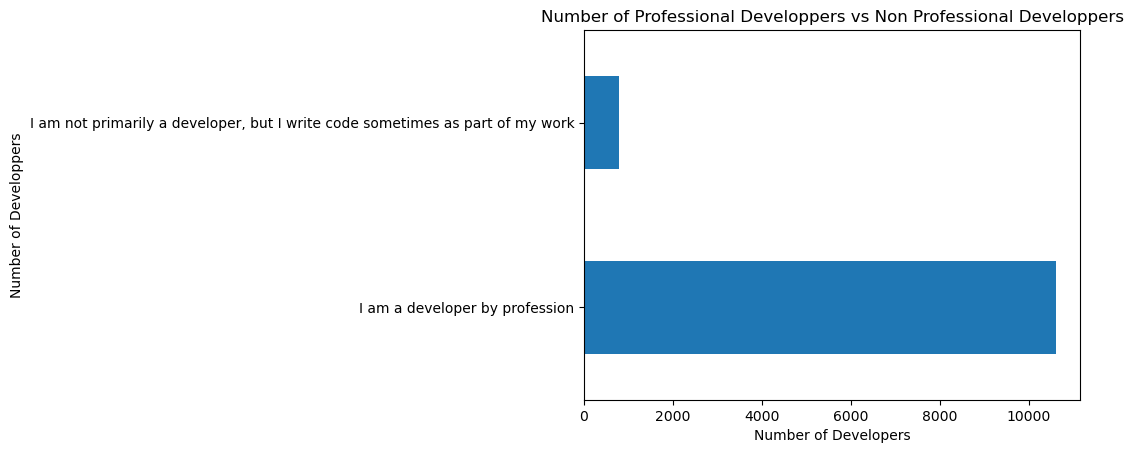

In [37]:
# your code goes here

query8 = """SELECT MainBranch
FROM master
"""
df_bchart = pd.read_sql_query(query8,conn)
df_bchart = df_bchart.groupby('MainBranch')['MainBranch'].count().to_frame('Counts')
df_bchart


df_bchart.plot(kind = 'barh')
plt.title('Number of Professional Developpers vs Non Professional Developpers')
plt.xlabel('Number of Developers')
plt.ylabel('Number of Developpers')
plt.legend('', frameon = False)
plt.show()

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

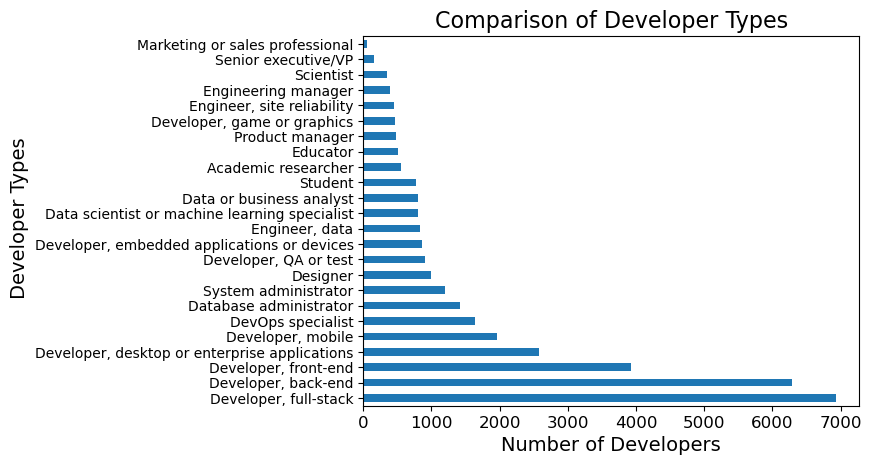

In [38]:
# We would like to know which Developer Type is the most represented in the survey
query8bis = """SELECT *
FROM DevType
"""
df_bchart2 = pd.read_sql_query(query8bis,conn)
df_bchart2 = df_bchart2.groupby('DevType')['DevType'].count().to_frame('Counts')
df_bchart2.sort_values(by = 'Counts', ascending = False, inplace = True)


df_bchart2.plot(kind = 'barh')
plt.title('Comparison of Developer Types', size = 16)
plt.xlabel('Number of Developers', size = 14)
plt.ylabel(' Developer Types', size = 14)
plt.legend('', frameon =False)
plt.xticks(size = 12)

Close the database connection.


# Let's plot a bar chart with to know the Compensations for every Developer

In [39]:
# Let's call the DevType Table
query9 = """SELECT *
FROM DevType
"""
df_developer = pd.read_sql_query(query9,conn)
# Let's change the column name 'DevType' to 'Developer Type'
df_developer.rename(columns = {'DevType':'DeveloperType'}, inplace = True)
df_developer


# Let's extract the corresponding column 'ConvertedComp'
query10 = """ SELECT * FROM master"""
df_conv = pd.read_sql_query(query10,conn)
df_conv.head(2)


# The variable Respondent is common to the tables DevType and master. We can join them

query11 = """SELECT d.Respondent, d.DevType, c.ConvertedComp
FROM DevType as d JOIN master as c
on d.Respondent = c.Respondent"""
df_salary = pd.read_sql_query(query11,conn)
df_salary

Respondent                     DevType  ConvertedComp
0               4       Developer, full-stack        61000.0
1               9      Database administrator        95179.0
2               9         Developer, back-end        95179.0
3               9        Developer, front-end        95179.0
4               9       Developer, full-stack        95179.0
...           ...                         ...            ...
35309       25141           Developer, mobile        80371.0
35310       25141              Engineer, data        80371.0
35311       25141  Engineer, site reliability        80371.0
35312       25141        System administrator        80371.0
35313       25142         Academic researcher            NaN

[35314 rows x 3 columns]

### From the previous table, let's plot the median salaries by developer type in a histogram

In [40]:
# Let's replace the missing values with th emean from the 'ConvertedComp' column
conv_median = df_salary['ConvertedComp'].median()

# Use the replace method from Pandas
df_salary['ConvertedComp'].replace(np.nan, conv_median, inplace = True)

# We group the data by mean of ConvertedComp

df_salary_mean = df_salary.groupby('DevType')['ConvertedComp'].mean().to_frame('Mean Annual Compensation')


# Let's sort the values in descending order by Mean Annual Compensation'
df_salary_mean.sort_values(by= 'Mean Annual Compensation', ascending = False, inplace = True)
df_salary_mean

# Let's retain only the top 5 Developer types
df_salary_mean_top10 = df_salary_mean.head(10)
df_salary_mean_top10

Mean Annual Compensation
DevType                                                                
Senior executive/VP                                       193176.468750
Engineer, site reliability                                191061.420935
Engineering manager                                       166179.360104
DevOps specialist                                         143211.231849
Engineer, data                                            142740.800481
Data or business analyst                                  140264.048628
Marketing or sales professional                           137430.311475
System administrator                                      131952.524958
Data scientist or machine learning specialist             131677.386052
Developer, QA or test                                     129587.072448

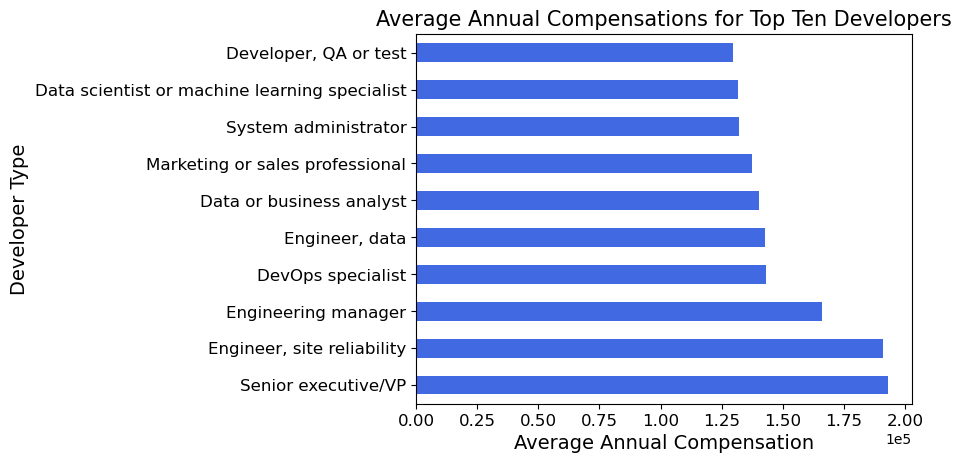

In [41]:
# Let's plot the data from the table df_salary_mean

df_salary_mean_top10.plot(kind = 'barh', color = 'royalblue')
plt.title('Average Annual Compensations for Top Ten Developers', size = 15)
plt.ylabel('Developer Type', size = 14)
plt.xlabel('Average Annual Compensation', size = 14)
plt.legend('DevType')
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.legend('', frameon=False)
plt.ticklabel_format(axis  = 'x', style = 'sci',  scilimits=(0, 0))
plt.savefig("test.png", dpi = 150)
plt.show()

# We want to know which gender has the better revenues

In [42]:
# Let's call the Gender Table
query12 = """SELECT *
FROM Gender
WHERE Gender IN ('Man', 'Woman')
"""
df_gender2 = pd.read_sql_query(query12,conn)
df_gender2

Respondent Gender
0               4    Man
1               9    Man
2              13    Man
3              16    Man
4              17    Man
...           ...    ...
11268       25136    Man
11269       25137    Man
11270       25138    Man
11271       25141    Man
11272       25142    Man

[11273 rows x 2 columns]

In [43]:
# The variable Respondent is common to the tables DevType, master and Gender. We can join them
query13 = """SELECT d.DevType, c.ConvertedComp, g.Gender
FROM DevType as d 
JOIN master as c
ON d.Respondent = c.Respondent
JOIN Gender as g
ON d.Respondent = g.Respondent
WHERE Gender = 'Woman'
"""
df_salary_gender = pd.read_sql_query(query13,conn)
df_salary_gender

DevType  ConvertedComp Gender
0                             Developer, full-stack         4128.0  Woman
1                              Developer, front-end        17491.0  Woman
2                               Developer, back-end        16008.0  Woman
3                              Developer, front-end        16008.0  Woman
4                                          Educator        16008.0  Woman
...                                             ...            ...    ...
1843  Developer, desktop or enterprise applications        38760.0  Woman
1844                           Developer, front-end        38760.0  Woman
1845                          Developer, full-stack        38760.0  Woman
1846                                       Educator        38760.0  Woman
1847                                        Student        38760.0  Woman

[1848 rows x 3 columns]

### From the previous table, let's plot the average salaries by developer type and gender in a histogram

In [44]:
# Let's replace the missing values with th emean from the 'ConvertedComp' column
conv_mean = df_salary_gender['ConvertedComp'].mean()

# Use the replace method from Pandas
df_salary_gender['ConvertedComp'].replace(np.nan, conv_mean, inplace = True)
df_salary_gender

# Obtain only the top 10 Developers who earn higher compensations
df_salary_gender = df_salary_gender.head(10)
df_salary_gender

DevType  ConvertedComp Gender
0  Developer, full-stack         4128.0  Woman
1   Developer, front-end        17491.0  Woman
2    Developer, back-end        16008.0  Woman
3   Developer, front-end        16008.0  Woman
4               Educator        16008.0  Woman
5    Developer, back-end       229016.0  Woman
6   Developer, front-end       229016.0  Woman
7  Developer, full-stack       229016.0  Woman
8        Product manager       229016.0  Woman
9    Developer, back-end       135000.0  Woman

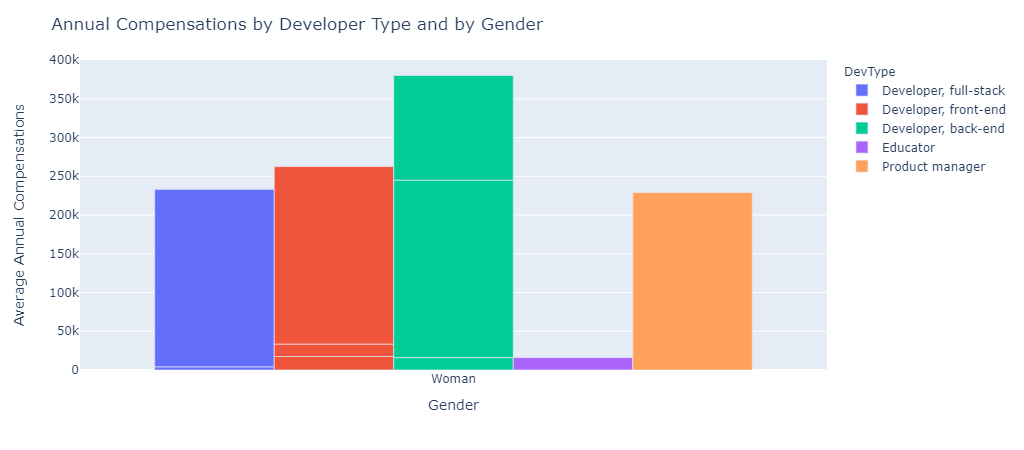

In [45]:
fig_gen = px.bar(df_salary_gender, x = 'Gender', y = 'ConvertedComp', color = 'DevType', barmode = 'group')

fig_gen.update_layout(title_text = 'Annual Compensations by Developer Type and by Gender',
                xaxis_title = 'Gender',
                yaxis_title = 'Average Annual Compensations', 
                      font=dict(
                            size=12,  # Set the font size here

    ))
fig_gen.show()

# We want to know the number of Respondents who work remotely and how Dependents affect theirpresence et the office

In [46]:
# Let's create a table with the columns 'WrokRemote' and 'Dependents'
query20 = """SELECT WorkRemote, Dependents
FROM master
"""
df_work = pd.read_sql_query(query20,conn)
df_work

WorkRemote Dependents
0                       Less than once per month / Never         No
1                       Less than once per month / Never         No
2      All or almost all the time (I'm full-time remote)        Yes
3                                  A few days each month         No
4                                  A few days each month         No
...                                                  ...        ...
11393                   Less than once per month / Never         No
11394                   Less than once per month / Never         No
11395                   Less than once per month / Never        Yes
11396                   Less than once per month / Never         No
11397                                   It's complicated         No

[11398 rows x 2 columns]

In [47]:
# Let's group the data and obtain the number of people who has dependents and their frequency of homeoffice
df_remote = df_work.groupby(['WorkRemote','Dependents'])['Dependents'].count().to_frame('Counts')
df_remote.sort_values(by = 'Counts', ascending = False, inplace = True)
df_remote.reset_index( inplace = True)
df_remote

WorkRemote Dependents  Counts
0                    Less than once per month / Never         No    3238
1                               A few days each month         No    1861
2                    Less than once per month / Never        Yes    1798
3                               A few days each month        Yes    1314
4   Less than half the time, but at least one day ...         No     594
5   Less than half the time, but at least one day ...        Yes     496
6   All or almost all the time (I'm full-time remote)        Yes     477
7   All or almost all the time (I'm full-time remote)         No     474
8                                    It's complicated         No     244
9                                    It's complicated        Yes     202
10              More than half, but not all, the time        Yes     151
11              More than half, but not all, the time         No     145
12                                About half the time         No     140
13                                About half the time        Yes     116

## Let's convert the previous table into a multiple bar chart

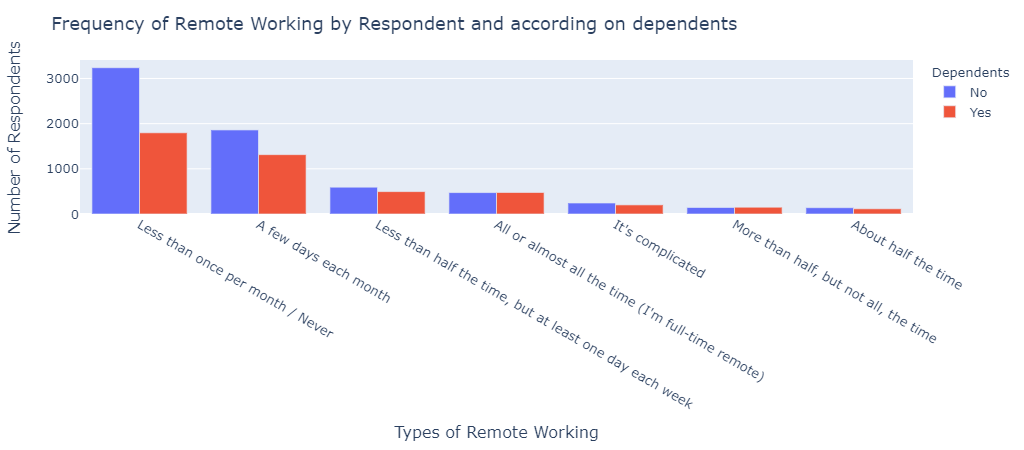

In [48]:
fig_mult = px.bar(df_remote, x = 'WorkRemote', y = 'Counts', color = 'Dependents', barmode = 'group')

fig_mult.update_layout(title_text = 'Frequency of Remote Working by Respondent and according on dependents',
                xaxis_title = 'Types of Remote Working',
                yaxis_title = 'Number of Respondents', 
                      font=dict(
                            size=13,  # Set the font size here

    ))
fig_mult.show()

# We want to know how many people with dependents code as a hobby

In [4]:
# Let's create a table with the columns 'Hobbyist' and 'Dependents'
query21 = """SELECT Hobbyist, Dependents
FROM master
"""
df_hobby = pd.read_sql_query(query21,conn)
df_hobby

Hobbyist Dependents
0           No         No
1          Yes         No
2          Yes        Yes
3          Yes         No
4          Yes         No
...        ...        ...
11393      Yes         No
11394      Yes         No
11395      Yes        Yes
11396      Yes         No
11397      Yes         No

[11398 rows x 2 columns]

In [6]:
# Let's group the data and obtain the number of people who has dependents and the number of times they code as a hobby
df_hobbyist = df_hobby.groupby(['Hobbyist','Dependents'])['Dependents'].count().to_frame('Counts')
df_hobbyist.sort_values(by = 'Counts', ascending = False, inplace = True)
df_hobbyist.reset_index( inplace = True)
df_hobbyist

Hobbyist Dependents  Counts
0      Yes         No    5520
1      Yes        Yes    3637
2       No         No    1179
3       No        Yes     922

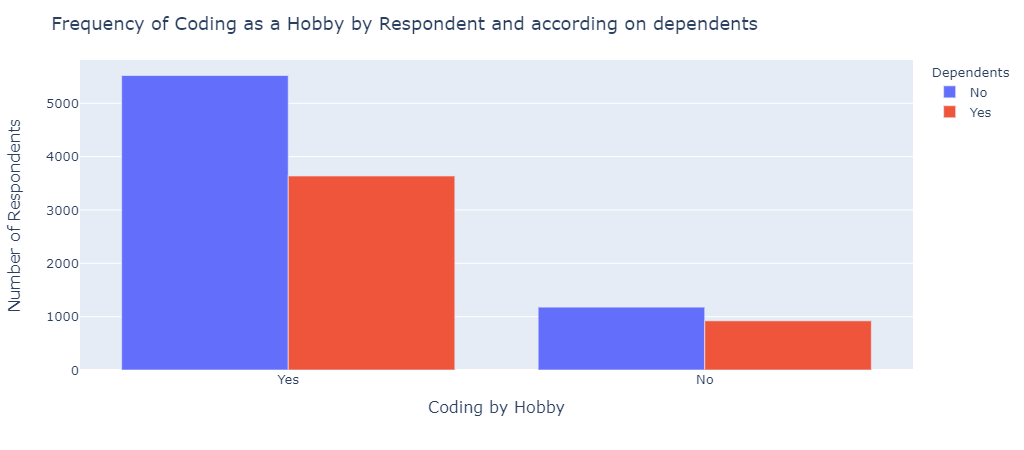

In [8]:
fig_mult2 = px.bar(df_hobbyist, x = 'Hobbyist', y = 'Counts', color = 'Dependents', barmode = 'group')

fig_mult2.update_layout(title_text = 'Frequency of Coding as a Hobby by Respondent and according on dependents',
                xaxis_title = 'Coding by Hobby',
                yaxis_title = 'Number of Respondents', 
                      font=dict(
                            size=13,  # Set the font size here

    ))
fig_mult2.show()

In [49]:
#conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
